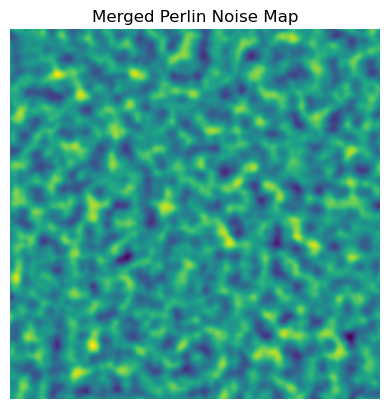

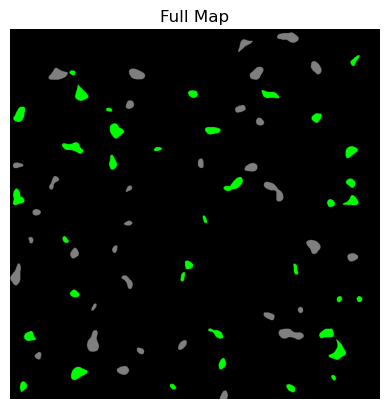

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
from scipy.ndimage import label, find_objects
import random

# Parameters for the 2D array
width, height = 1000, 1000
scale = 50.0

# Create two 2D arrays with Perlin noise to generate an organic shape
def generate_noise_array(width, height, scale, base):
    return np.array([[pnoise2(i / scale, j / scale, octaves=3, persistence=0.4, lacunarity=1.5, base=base) 
                      for j in range(width)] for i in range(height)])

array1 = generate_noise_array(width, height, scale, base=42)
array2 = generate_noise_array(width, height, scale, base=24)

# Merge the two Perlin noise maps for more randomness
merged_array = (array1 + array2) / 2

# Plot the merged Perlin noise map
plt.imshow(merged_array, cmap='viridis')
plt.title('Merged Perlin Noise Map')
plt.axis('off')
plt.show()

# Threshold to create a natural shape (like an island or organic blob)
threshold = 0.2
organic_shape = merged_array > threshold

# Label connected regions and analyze cluster sizes
labeled_array, num_features = label(organic_shape)
objects = find_objects(labeled_array)

# Calculate sizes of all clusters and sort by size
cluster_sizes = [(i + 1, np.sum(labeled_array[obj_slice] == (i + 1))) for i, obj_slice in enumerate(objects)]
cluster_sizes.sort(key=lambda x: x[1])

# Determine the size thresholds for top 80% and bottom 30%
num_clusters = len(cluster_sizes)
min_index = int(num_clusters * 0.25)
max_index = int(num_clusters * 0.95)

# Filter clusters to keep only those within the middle 50% range
filtered_shape = np.zeros_like(organic_shape)
for cluster_id, size in cluster_sizes[min_index:max_index]:
    filtered_shape[labeled_array == cluster_id] = 1

# Create a random color assignment for each blob (either grey or green)
final_shape = np.zeros((height, width, 3))
for cluster_id, _ in cluster_sizes[min_index:max_index]:
    color = [0.5, 0.5, 0.5] if random.random() < 0.5 else [0, 1, 0]  # Grey or Green
    final_shape[labeled_array == cluster_id] = color

# Plot the final shape with random colors
plt.imshow(final_shape)
plt.title('Full Map')
plt.axis('off')
plt.show()



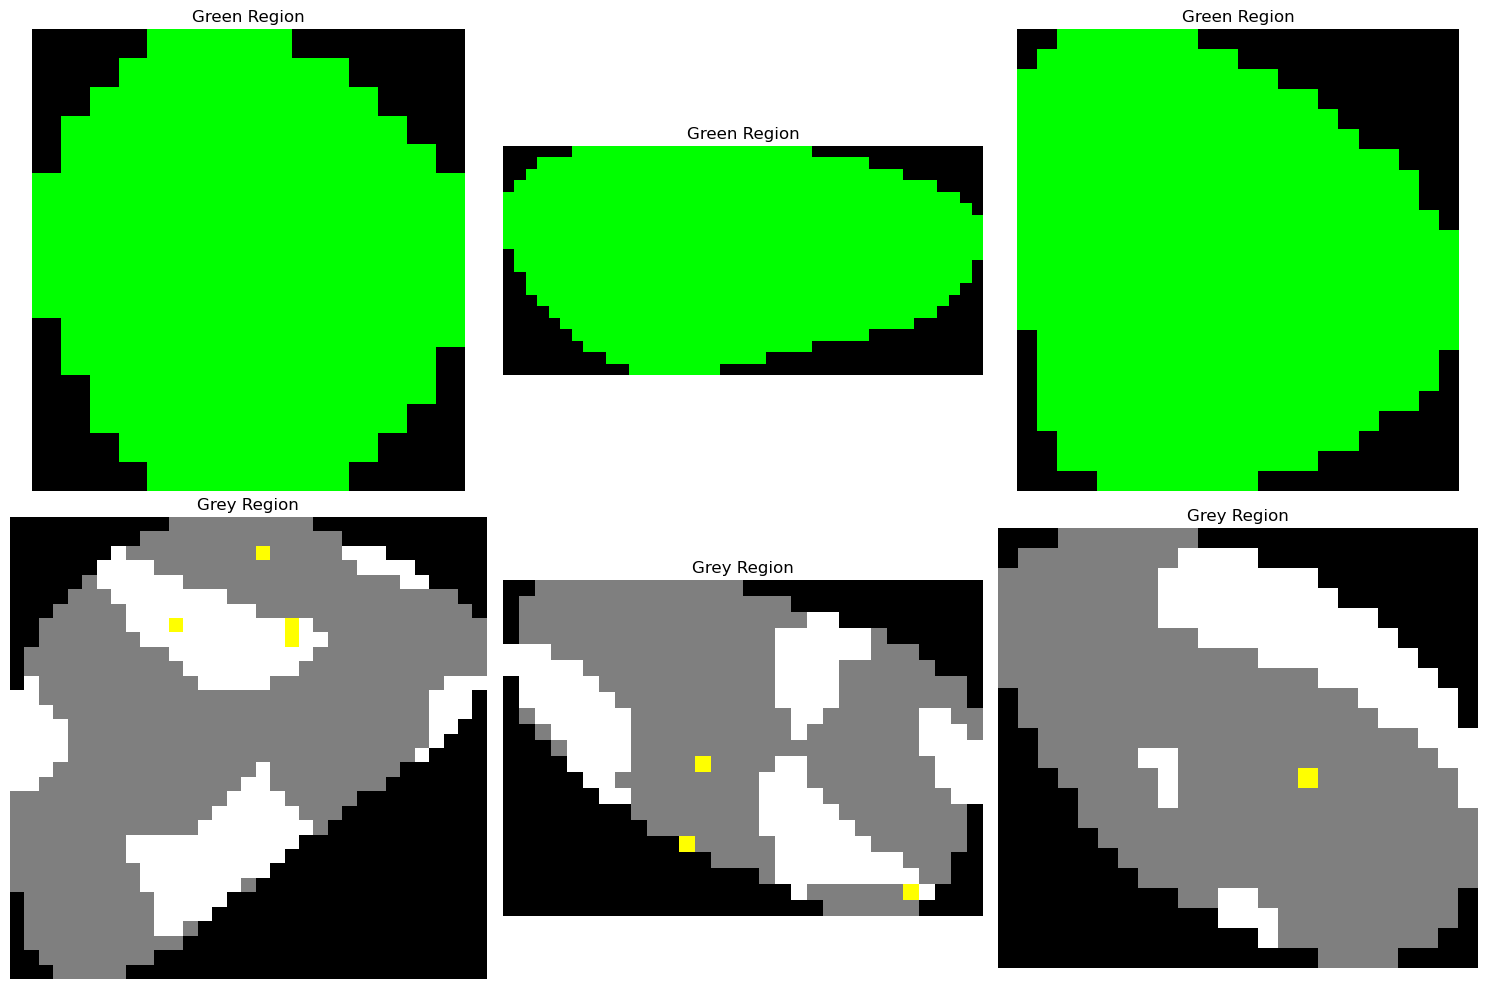

In [46]:

# Randomly pick and display three green and three grey regions
green_regions = [cluster_id for cluster_id, _ in cluster_sizes[min_index:max_index] if np.all(final_shape[labeled_array == cluster_id][0] == [0, 1, 0])]
grey_regions = [cluster_id for cluster_id, _ in cluster_sizes[min_index:max_index] if np.all(final_shape[labeled_array == cluster_id][0] == [0.5, 0.5, 0.5])]

# Ensure at least three regions are available
selected_green_regions = random.sample(green_regions, min(3, len(green_regions)))
selected_grey_regions = random.sample(grey_regions, min(3, len(grey_regions)))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Display three green regions, fitted to actual size
for idx, cluster_id in enumerate(selected_green_regions):
    obj_slice = objects[cluster_id - 1]
    green_region_display = final_shape[obj_slice]
    axes[0, idx].imshow(green_region_display)
    axes[0, idx].set_title('Green Region')
    axes[0, idx].axis('off')

# Display three grey regions, fitted to actual size
for idx, cluster_id in enumerate(selected_grey_regions):
    obj_slice = objects[cluster_id - 1]
    grey_region_display = final_shape[obj_slice]
    axes[1, idx].imshow(grey_region_display)
    axes[1, idx].set_title('Grey Region')
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

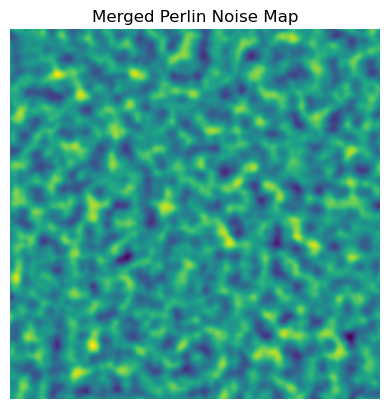

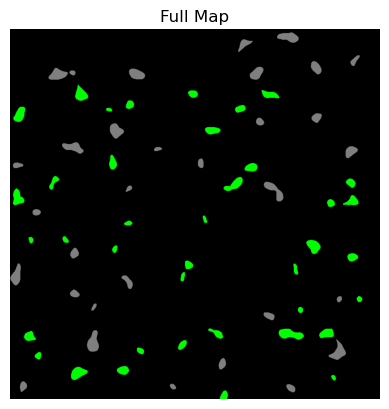

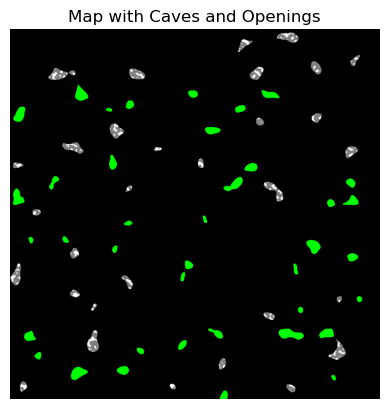

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
from scipy.ndimage import label, find_objects
import random

# Parameters for the 2D array
width, height = 1000, 1000
scale = 50.0

# Create two 2D arrays with Perlin noise to generate an organic shape
def generate_noise_array(width, height, scale, base):
    return np.array([[pnoise2(i / scale, j / scale, octaves=3, persistence=0.4, lacunarity=1.5, base=base) 
                      for j in range(width)] for i in range(height)])

array1 = generate_noise_array(width, height, scale, base=42)
array2 = generate_noise_array(width, height, scale, base=24)

# Merge the two Perlin noise maps for more randomness
merged_array = (array1 + array2) / 2

# Plot the merged Perlin noise map
plt.imshow(merged_array, cmap='viridis')
plt.title('Merged Perlin Noise Map')
plt.axis('off')
plt.show()

# Threshold to create a natural shape (like an island or organic blob)
threshold = 0.2
organic_shape = merged_array > threshold

# Label connected regions and analyze cluster sizes
labeled_array, num_features = label(organic_shape)
objects = find_objects(labeled_array)

# Calculate sizes of all clusters and sort by size
cluster_sizes = [(i + 1, np.sum(labeled_array[obj_slice] == (i + 1))) for i, obj_slice in enumerate(objects)]
cluster_sizes.sort(key=lambda x: x[1])

# Determine the size thresholds for top 80% and bottom 30%
num_clusters = len(cluster_sizes)
min_index = int(num_clusters * 0.25)
max_index = int(num_clusters * 0.95)

# Filter clusters to keep only those within the middle 50% range
filtered_shape = np.zeros_like(organic_shape)
for cluster_id, size in cluster_sizes[min_index:max_index]:
    filtered_shape[labeled_array == cluster_id] = 1

# Create a random color assignment for each blob (either grey or green)
final_shape = np.zeros((height, width, 3))
for cluster_id, _ in cluster_sizes[min_index:max_index]:
    color = [0.5, 0.5, 0.5] if random.random() < 0.5 else [0, 1, 0]  # Grey or Green
    final_shape[labeled_array == cluster_id] = color

# Plot the final shape with random colors
plt.imshow(final_shape)
plt.title('Full Map')
plt.axis('off')
plt.show()

# Generate cave within each grey region
grey_regions = [cluster_id for cluster_id, _ in cluster_sizes[min_index:max_index] if np.all(final_shape[labeled_array == cluster_id][0] == [0.5, 0.5, 0.5])]

for cluster_id in grey_regions:
    obj_slice = objects[cluster_id - 1]
    grey_region = (labeled_array[obj_slice] == cluster_id)
    cave_noise = generate_noise_array(grey_region.shape[1], grey_region.shape[0], scale=10.0, base=random.randint(0, 100))
    cave_threshold = 0.1
    cave_shape = cave_noise > cave_threshold
    
    # Make the interior of the grey region into a cave-like structure (white is open space)
    cave_region = np.zeros_like(grey_region, dtype=np.float32)
    cave_region[cave_shape & grey_region] = 1  # Open areas within the cave
    final_shape[obj_slice][..., 0] = np.where(cave_region, 1, final_shape[obj_slice][..., 0])
    final_shape[obj_slice][..., 1] = np.where(cave_region, 1, final_shape[obj_slice][..., 1])
    final_shape[obj_slice][..., 2] = np.where(cave_region, 1, final_shape[obj_slice][..., 2])

# Create openings (in yellow) along the boundary of the grey regions
for cluster_id in grey_regions:
    obj_slice = objects[cluster_id - 1]
    grey_region = (labeled_array[obj_slice] == cluster_id)
    boundary_points = np.argwhere(grey_region)
    
    # Randomly select 1-7 boundary points to create openings (weighted towards 1)
    num_openings = random.choices(range(1, 8), weights=[50, 20, 10, 8, 6, 4, 2], k=1)[0]
    selected_points = boundary_points[random.sample(range(len(boundary_points)), num_openings)]
    
    # Mark the openings in yellow
    for point in selected_points:
        final_shape[obj_slice][point[0], point[1]] = [1, 1, 0]  # Yellow for openings

# Plot the final map with caves and openings
plt.imshow(final_shape)
plt.title('Map with Caves and Openings')
plt.axis('off')
plt.show()